In [1]:
from ActorNetwork import ActorNetwork
import pickle

In [2]:
import json

# def export_actor_network_to_json(an, filename="actor_network.json"):
#     """
#     Export the ActorNetwork as an unweighted adjacency dictionary.
#     """

#     adjacency = {}

#     for actor, neighbors in an.costars.items():
#         # ensure JSON-serializable lists
#         adjacency[actor] = sorted(list(neighbors))

#     with open(filename, "w", encoding="utf-8") as f:
#         json.dump(adjacency, f, indent=2, ensure_ascii=False)

    

#     print(f"Actor network exported to {filename}")

file_path = 'data/pkl/criterion_actor_network.pkl'


with open(file_path, 'rb') as file:
    an = pickle.load(file)
        
#export_actor_network_to_json(an,"data/viz/json/actorNetHTML.json")


In [8]:
import networkx as nx

def actor_network_to_nx(an):
    """
    Convert ActorNetwork -> NetworkX Graph
    """
    G = nx.Graph()

    for actor, neighbors in an.costars.items():
        for neighbor in neighbors:
            G.add_edge(actor, neighbor)

    return G

G=actor_network_to_nx(an)

import networkx as nx
#import community as community_louvain  
import community.community_louvain as community_louvain

# Run Louvain
partition = community_louvain.best_partition(G)

# partition: dict {node -> community_id}


In [9]:
num_communities = len(set(partition.values()))
print("Number of communities:", num_communities)


Number of communities: 207


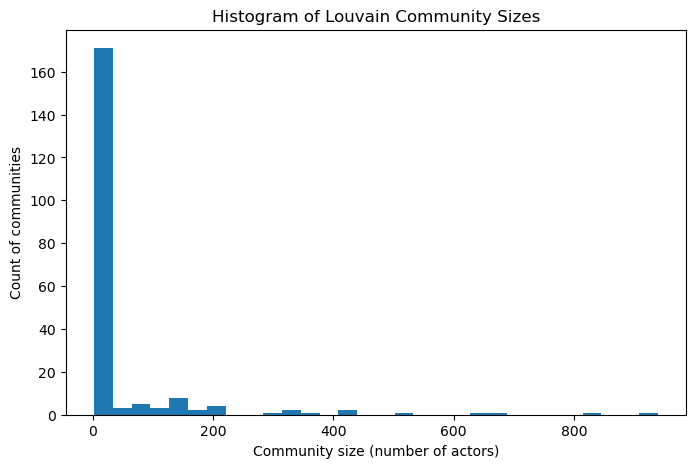

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Count nodes per community
community_sizes = Counter(partition.values())

sizes = list(community_sizes.values())

plt.figure(figsize=(8, 5))
plt.hist(sizes, bins=30)
plt.xlabel("Community size (number of actors)")
plt.ylabel("Count of communities")
plt.title("Histogram of Louvain Community Sizes")
plt.show()


In [11]:
from collections import Counter

# community_id -> size
community_sizes = Counter(partition.values())

# get the two largest community IDs
largest_communities = [cid for cid, _ in community_sizes.most_common(2)]

largest_communities


[5, 0]

In [13]:
nodes_keep = {
    node for node, cid in partition.items()
    if cid in largest_communities
}
G_sub = G.subgraph(nodes_keep).copy()

print(G_sub.number_of_nodes(), G_sub.number_of_edges())

import json

data = {
    "nodes": [
        {
            "id": n,
            "community": partition[n]
        }
        for n in G_sub.nodes()
    ],
    "links": [
        {
            "source": u,
            "target": v
        }
        for u, v in G_sub.edges()
    ]
}

with open("data/viz/json/top2_communities.json", "w") as f:
    json.dump(data, f, indent=2)


1784 12569
